# Victims of Mass Shootings Visualization

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from datetime import datetime
import gmaps.datasets
import gmaps.geojson_geometries

from config import (census_key, gkey)

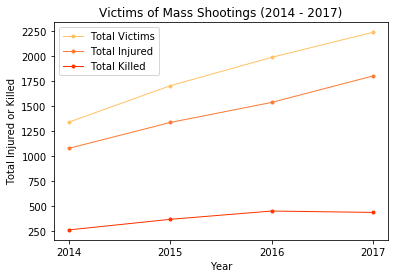

<Figure size 432x288 with 0 Axes>

In [43]:
#load in df from exploration data
totals_df = pd.read_csv("totals_df.csv")
totals_df = pd.DataFrame(data = totals_df)
totals_df['Year'] = totals_df['Year'].astype(str) #change year to string for a neat x axis on graph

#create graph over time of those injured or killed
total, = plt.plot(totals_df['Year'], totals_df['Total Injured or Killed'], color = str('#ffc266'),linewidth=1, label ="Total Victims", marker = '.')
injured, = plt.plot(totals_df['Year'], totals_df['Total Injured'], color=str('#ff7a33'), linewidth=1, label="Total Injured", marker = ".")
killed, = plt.plot(totals_df['Year'], totals_df['Total Killed'], color=str('#ff3300'), linewidth=1, label="Total Killed", marker = ".")
plt.legend(handles=[total, injured, killed])
plt.xlabel('Year')
plt.title("Victims of Mass Shootings (2014 - 2017)")
plt.ylabel('Total Injured or Killed')
plt.show()

plt.savefig("Plots/Overall_Victims.png")

# Total Number of Mass Shootings Visualization

In [4]:
#load in df from exploration data
total_mass_shootings = pd.read_csv("total_mass_shootings.csv")
total_mass_shootings = pd.DataFrame(data = total_mass_shootings)
total_mass_shootings.dtypes
total_mass_shootings['years'] = total_mass_shootings['years'].astype(str) #convert years to object for neat x axis on plot
total_mass_shootings

,years,total_shootings
0,2014,268
1,2015,335
2,2016,382
3,2017,346


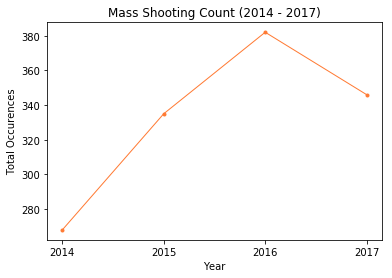

<Figure size 432x288 with 0 Axes>

In [41]:
colors = str('#ff7a33')
total, = plt.plot(total_mass_shootings['years'], total_mass_shootings['total_shootings'], color = colors,linewidth=1, marker = '.')

plt.xlabel('Year')
plt.title("Mass Shooting Count (2014 - 2017)")
plt.ylabel('Total Occurences')
plt.show()
plt.savefig("Plots/Overall_Count.png")

# Heatmaps with gmaps

In [6]:
#load in df from exploration data
merged_2014 = pd.read_csv("merged_2014.csv")
merged_2015 = pd.read_csv("merged_2015.csv")
merged_2016 = pd.read_csv("merged_2016.csv")
merged_2017 = pd.read_csv("merged_2017.csv")

In [7]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [8]:
merged_2014.head()

,States,Mass Shooting Count,Total_Victims,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rates,Unemployment Count,Unemployment Rates,Latitude,Longitude,Per Capita Mass Shooting
0,Alabama,2,10,1,4817678.0,38.2,43511.0,23936.0,889710.0,18.467610,228716.0,4.747432,32.7794,-86.8287,0.207569
1,Alaska,1,6,2,728300.0,33.4,71829.0,33129.0,71866.0,9.867637,32097.0,4.407112,64.0685,-152.2782,0.823836
2,Arizona,1,4,4,6561516.0,36.5,49928.0,25537.0,1169309.0,17.820714,304067.0,4.634097,34.2744,-111.6602,0.060962
3,Arkansas,2,12,5,2947036.0,37.6,41264.0,22595.0,549303.0,18.639168,115090.0,3.905280,34.8938,-92.4426,0.407189
4,California,42,208,6,38066920.0,35.6,61489.0,29906.0,6115244.0,16.064457,2084564.0,5.476051,37.1841,-119.4696,0.546406


In [9]:
#2014 
#define location and heatpoint
locations = merged_2014[['Latitude', 'Longitude']]
rating = merged_2014['Mass Shooting Count']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
#2014
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2014[['Latitude', 'Longitude']], weights=merged_2014['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff',
   '#ffc266',
   '#ff7a33',
   '#ff3300'
]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
#2015 
#define location and heatpoint
locations = merged_2015[['Latitude', 'Longitude']]
rating = merged_2015['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
#2015
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2015[['Latitude', 'Longitude']], weights=merged_2015['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff',
   '#ffc266',
   '#ff7a33',
   '#ff3300'
]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
#2016 
#define location and heatpoint
locations = merged_2016[['Latitude', 'Longitude']]
rating = merged_2016['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
#2016
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2016[['Latitude', 'Longitude']], weights=merged_2016['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff',
   '#ffc266',
   '#ff7a33',
   '#ff3300'
]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
#2017 
#define location and heatpoint
locations = merged_2017[['Latitude', 'Longitude']]
rating = merged_2017['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
#2017
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2017[['Latitude', 'Longitude']], weights=merged_2017['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff',
   '#ffc266',
   '#ff7a33',
   '#ff3300'
]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Heatmaps Per Capita with gmaps

In [17]:
merged_2014

,States,Mass Shooting Count,Total_Victims,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rates,Unemployment Count,Unemployment Rates,Latitude,Longitude,Per Capita Mass Shooting
0,Alabama,2,10,1,4817678.0,38.2,43511.0,23936.0,889710.0,18.467610,228716.0,4.747432,32.7794,-86.8287,0.207569
1,Alaska,1,6,2,728300.0,33.4,71829.0,33129.0,71866.0,9.867637,32097.0,4.407112,64.0685,-152.2782,0.823836
2,Arizona,1,4,4,6561516.0,36.5,49928.0,25537.0,1169309.0,17.820714,304067.0,4.634097,34.2744,-111.6602,0.060962
3,Arkansas,2,12,5,2947036.0,37.6,41264.0,22595.0,549303.0,18.639168,115090.0,3.905280,34.8938,-92.4426,0.407189
4,California,42,208,6,38066920.0,35.6,61489.0,29906.0,6115244.0,16.064457,2084564.0,5.476051,37.1841,-119.4696,0.546406
5,Colorado,2,9,8,5197580.0,36.2,59448.0,31674.0,663861.0,12.772502,219241.0,4.218136,38.9972,-105.5478,0.173158
6,Connecticut,1,5,9,3592053.0,40.3,69899.0,38480.0,364740.0,10.154082,186587.0,5.194439,41.6219,-72.7273,0.139196
7,District of Columbia,6,27,11,633736.0,33.7,69235.0,46502.0,109378.0,17.259237,38496.0,6.074454,38.9101,-77.0147,4.260449
8,Florida,16,91,12,19361792.0,41.2,47212.0,26499.0,3159259.0,16.316976,1024905.0,5.293441,28.6305,-82.4497,0.469998
9,Georgia,17,85,13,9907756.0,35.8,49342.0,25427.0,1781388.0,17.979732,519291.0,5.241257,32.6415,-83.4426,0.857914


In [18]:
#2014 
#magnify mass shooting per capita so it shows up on the map
#merged_2014['Per Capita Mass exp'] = merged_2014['Per Capita Mass Shooting'] *1500000

#define location and heatpoint
locations = merged_2014[['Latitude', 'Longitude']]
rating = merged_2014['Per Capita Mass Shooting']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [68]:
#2014
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2014[['Latitude', 'Longitude']], weights=merged_2014['Per Capita Mass Shooting'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff',
   '#ffc266',
   '#ff7a33',
   '#ff3300'
]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
#2015 
#magnify mass shooting per capita so it shows up on the map
merged_2015['Per Capita Mass exp'] = merged_2015['Per Capita Mass Shooting'] *10

#define location and heatpoint
locations = merged_2015[['Latitude', 'Longitude']]
rating = merged_2015['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
#2015
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2015[['Latitude', 'Longitude']], weights=merged_2015['Per Capita Mass Shooting'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff',
   '#ffc266',
   '#ff7a33',
   '#ff3300'
]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
#2016 
#magnify mass shooting per capita so it shows up on the map
merged_2016['Per Capita Mass exp'] = merged_2016['Per Capita Mass Shooting'] *10

#define location and heatpoint
locations = merged_2016[['Latitude', 'Longitude']]
rating = merged_2016['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [66]:
#2016
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2016[['Latitude', 'Longitude']], weights=merged_2016['Per Capita Mass Shooting'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff',
   '#ffc266',
   '#ff7a33',
   '#ff3300'
]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
#2017
#magnify mass shooting per capita so it shows up on the map
merged_2017['Per Capita Mass exp'] = merged_2017['Per Capita Mass Shooting'] * 10

#define location and heatpoint
locations = merged_2017[['Latitude', 'Longitude']]
rating = merged_2017['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [65]:
#2017
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2017[['Latitude', 'Longitude']], weights=merged_2017['Per Capita Mass Shooting'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff',
   '#ffc266',
   '#ff7a33',
   '#ff3300'
]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Scatter Plots with Census Data

In [ ]:
#Poverty Rates
plt.scatter(merged_2017['Poverty Rates'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Poverty Rate')
plt.title("State Poverty Rate vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig("Plots/Poverty_Rate.png")

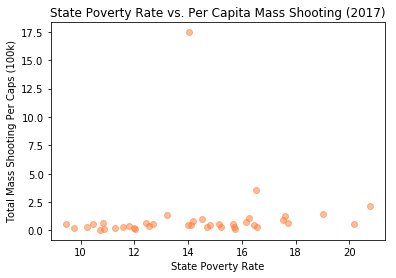

<Figure size 432x288 with 0 Axes>

In [44]:
#Poverty Rates per capita
plt.scatter(merged_2017['Poverty Rates'], merged_2017['Per Capita Mass Shooting'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Poverty Rate')
plt.title("State Poverty Rate vs. Per Capita Mass Shooting (2017)")
plt.ylabel('Total Mass Shooting Per Caps (100k)')
plt.show()

plt.savefig("Plots/Poverty_Rate_percaps.png")

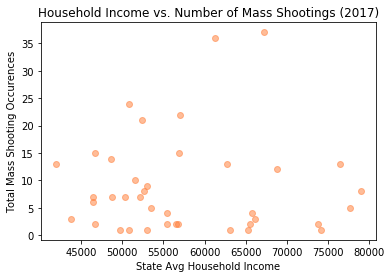

<Figure size 432x288 with 0 Axes>

In [45]:
#Household Income
plt.scatter(merged_2017['Household Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Avg Household Income')
plt.title("Household Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Household_Income.png')

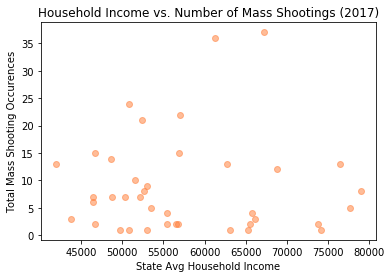

['Per Capita Mass Shooting']

<Figure size 432x288 with 0 Axes>

In [46]:
#Household Income
plt.scatter(merged_2017['Household Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Avg Household Income')
plt.title("Household Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Household_Income.png')

['Per Capita Mass Shooting']

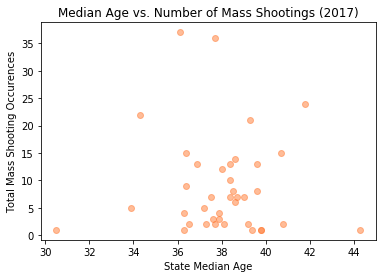

<Figure size 432x288 with 0 Axes>

In [47]:
#Median Age
plt.scatter(merged_2017['Median Age'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Median Age')
plt.title("Median Age vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Median_Age.png')

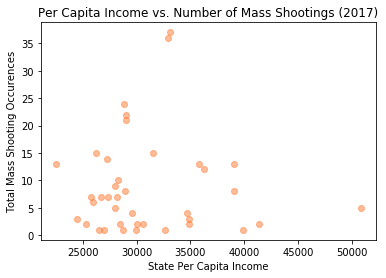

<Figure size 432x288 with 0 Axes>

In [48]:
#Per Capita Income
plt.scatter(merged_2017['Per Capita Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Per Capita Income')
plt.title("Per Capita Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Income.png')

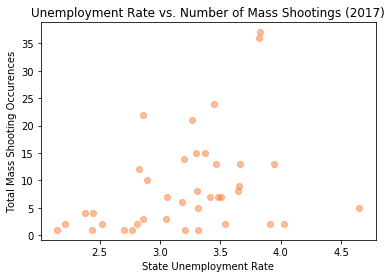

<Figure size 432x288 with 0 Axes>

In [49]:
#Unemployment Rate
plt.scatter(merged_2017['Unemployment Rates'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Unemployment Rate')
plt.title("Unemployment Rate vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Unemployment_Rate.png')

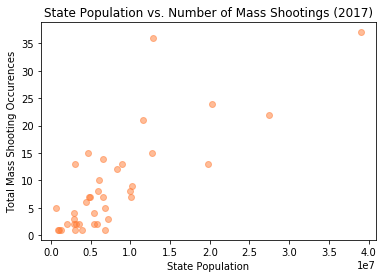

<Figure size 432x288 with 0 Axes>

In [50]:
plt.scatter(merged_2017['Population'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Population')
plt.title("State Population vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Population.png')

# Hate Group Data

In [51]:
#2017
#load in hategroup activity data
hate = pd.read_csv('Original_Hate_Data/splc-hate-groups-2017.csv')
hate = pd.DataFrame(data = hate)
#rename column for merge with full df
hate = hate.rename(columns = {'State':'States'})

#create a count of hategroups by state
hate_group = hate.groupby(['States']).count()['Title']
hate_group = pd.DataFrame(data = hate_group)
hate_group = hate_group.reset_index()
hate_group_merged = pd.merge(merged_2017, hate_group, on = 'States')

#rename for tidy analysis
hate_group_merged = hate_group_merged.rename(columns = {'Title': 'Hate Group Count'})

In [53]:
#2016
#load in hategroup activity data
hate2016 = pd.read_csv('Original_Hate_Data/splc-hate-groups-2016.csv')
hate2016 = pd.DataFrame(data = hate2016)
#rename column for merge with full df
hate2016 = hate2016.rename(columns = {'State':'States'})

#create a count of hategroups by state
hate_group_2016 = hate2016.groupby(['States']).count()['Title']
hate_group_2016 = pd.DataFrame(data = hate_group_2016)
hate_group_2016 = hate_group_2016.reset_index()
hate_group_merged_2016 = pd.merge(merged_2016, hate_group, on = 'States')

#rename for tidy analysis
hate_group_merged_2016 = hate_group_merged_2016.rename(columns = {'Title': 'Hate Group Count'})


In [55]:
#new column for hate groups per capita
hate_group_merged['Per Capita Hate Group'] = hate_group_merged['Hate Group Count'] / hate_group_merged['Population'] * 100000
hate_group_merged_2016['Per Capita Hate Group'] = hate_group_merged_2016['Hate Group Count'] / hate_group_merged_2016['Population'] * 100000

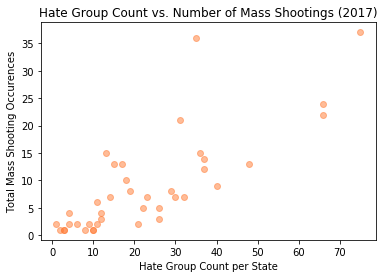

<Figure size 432x288 with 0 Axes>

In [63]:
#2016 hate group count
plt.scatter(hate_group_merged['Hate Group Count'], hate_group_merged['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Hate_Groups.png')

In [61]:
#2017 Hate Group Count

#define location and heatpoint
locations = hate_group_merged[['Latitude', 'Longitude']]
rating = hate_group_merged['Hate Group Count']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [64]:
#2017 Hate Group Count per Capita
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   hate_group_merged[['Latitude', 'Longitude']], weights=hate_group_merged['Hate Group Count'] , dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff',
   '#ffc266',
   '#ff7a33',
   '#ff3300'
]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
#2017 Hate Group Count per Capita
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   hate_group_merged[['Latitude', 'Longitude']], weights=hate_group_merged['Per Capita Hate Group'] * 10 , dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff',
   '#ffc266',
   '#ff7a33',
   '#ff3300'
]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
hate_group_merged.to_csv("hate_group_merged_2017.csv", index = False, header=True)